<a href="https://colab.research.google.com/github/manualAlan/ComPhys/blob/main/neurons_difussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GDM

# Method1

Text(0, 0.5, 'frequency')

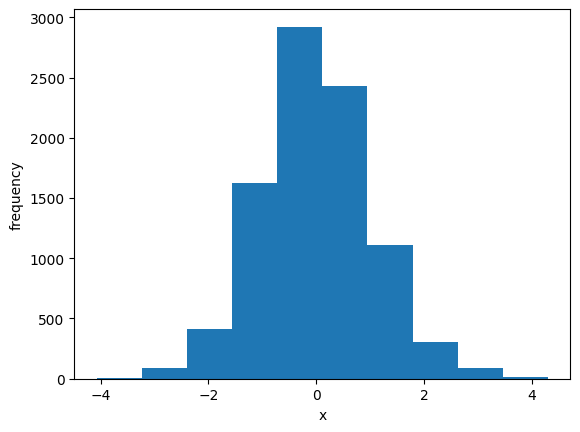

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def E(x):
  return x**2/2
def ForwardDiffusion(x_0,T, delta):
  locations = []
  x=x_0
  for t in range(T):
    x=x-delta/2*x+delta**(1/2)*np.random.randn()
    locations.append(x)
  return locations
locs=ForwardDiffusion(-100,10000, 0.1)
plt.hist(locs[1000:])
plt.xlabel("x")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

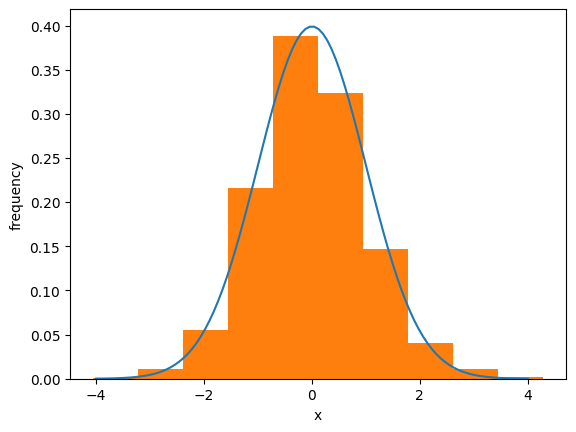

In [ ]:
def p1(x):
  return 1/(2*np.pi)**(1/2)*np.exp(-x**2/2)
xs=np.linspace(-4,4,100)
ys=[]
for x in xs:
  ys.append(p1(x))
plt.plot(xs,ys)
plt.hist(locs[1000:],density=True)
plt.xlabel("x")
plt.ylabel("frequency")

# Method2

Text(0, 0.5, 'frequency')

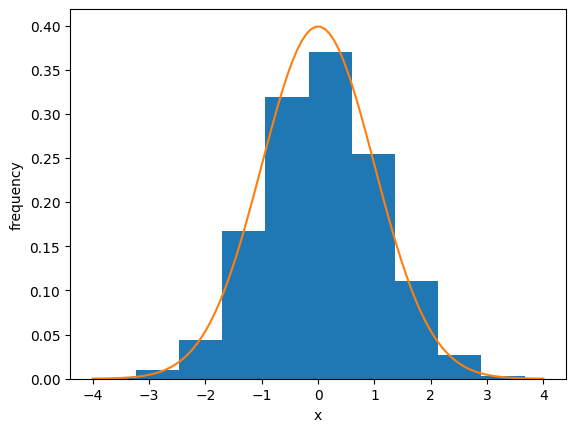

In [ ]:
delta = 0.1
def E(x):
  return x**2/2
def method2(x,T,delta):
  locs=[]
  for t in range(T):
    x1=np.random.normal(loc=x,scale =1)
    p=np.exp(-E(x1)+E(x))
    if np.random.uniform(0,1)<p:
      x=x1
    locs.append(x)
  return locs
locs=method2(0,10000,delta)
plt.hist(locs[1000:],density=True)
plt.plot(xs,ys)
plt.xlabel("x")
plt.ylabel("frequency")

Acceptance ratio monte carlo

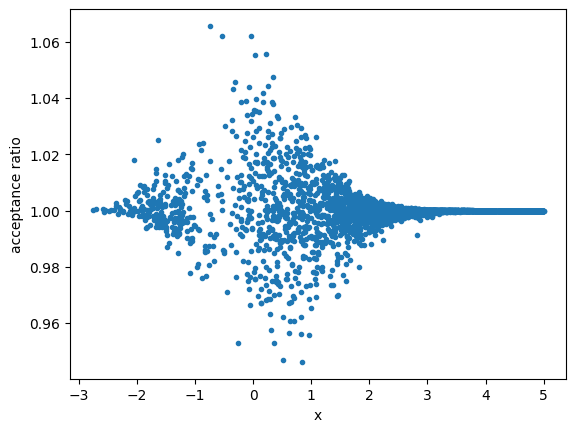

In [ ]:
delta = 0.05
def F(x):
  return np.exp(-E(x))
def method22(x,T,delta):
  xxs=[]
  yys=[]
  for t in range(T):
    x1=np.random.normal(loc = x+delta/2*F(x),scale = delta**(1/2))
    p=np.exp(-((x+delta/2*F(x))-x1)**2/2/delta)#
    a=np.exp(delta*(x-x1)*(F(x)+F(x1))+(delta/2)**2*(F(x)**2-F(x1)**2))
    if np.random.uniform(0,1)<a:
      x=x1
      if np.abs(x)<5:
        xxs.append(x)
        yys.append(a)
  return xxs,yys
xxs,yys=method22(0.2,10000,delta)
plt.plot(xxs,yys,'.')
plt.xlabel("x")
plt.ylabel("acceptance ratio")
plt.show()

Acceptance ratio as a function of location

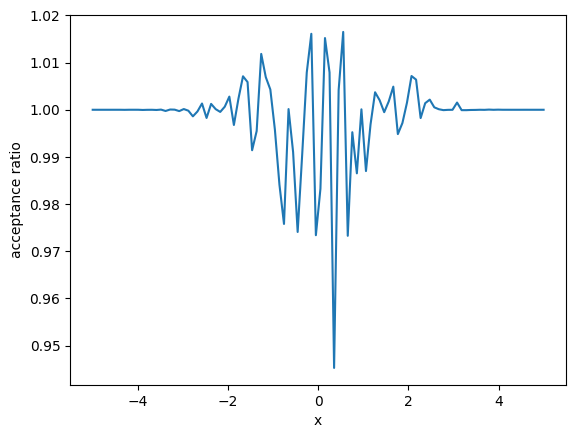

In [ ]:
xs= np.linspace(-5,5,100)
delta = 0.05
ass=[]
for x in xs:
  x1=x+delta/2*F(x)+delta**(1/2)*np.random.randn()
  a=np.exp(delta*(x-x1)*(F(x)+F(x1))+(delta/2)**2*(F(x)**2-F(x1)**2))
  ass.append(a)
plt.plot(xs,ass)
plt.xlabel("x")
plt.ylabel("acceptance ratio")
plt.show()


# Method 3

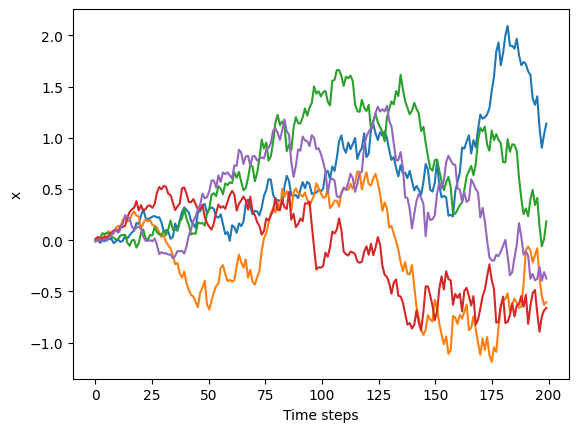

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
T = 199
beta = np.linspace(0.0001, 0.02, T,dtype=np.float32)
ts=np.linspace(0,199,199)
for i in range(5):
  xs=[]
  x0=0
  for t in range(T):
      x0=x0*(1-beta[t])**(1/2)+beta[t]**(1/2)*np.random.randn()
      xs.append(x0)
  plt.plot(ts,xs)
plt.xlabel("Time steps")
plt.ylabel("x")
plt.show()

In [ ]:
import numpy as np
T = 199
beta = np.linspace(0.0001, 0.02, T,dtype=np.float32)
def ForwardDiffusion(x0,beta,T):
  for t in range(T):
    x0= x0*(1-beta[t])**(1/2)+beta[t]**(1/2)*np.random.randn()
  return x0
xss=[]
for i in range(10000):
  xss.append(ForwardDiffusion(0,beta,T))

Text(0, 0.5, 'frequency')

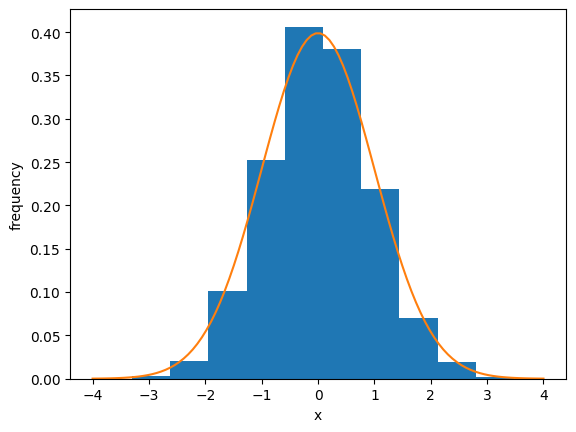

In [ ]:
import matplotlib.pyplot as plt
plt.hist(xss,density=True)
xs=np.linspace(-4,4,100)
ys=[]
for x in xs:
  ys.append(p1(x))
plt.plot(xs,ys)
plt.xlabel("x")
plt.ylabel("frequency")

In [ ]:

T =200
beta = np.linspace(0.0001, 0.02, T,dtype=np.float32)
at = []
at_=[]
at__=1
# for t in range(1,T):
#     at=at*(1-beta[t])
for t in range(T):
  at.append(1-beta[t])
  at__=at__*(1-beta[t])
  at_.append(at__)

fast forward difussion

Text(0, 0.5, 'frequency')

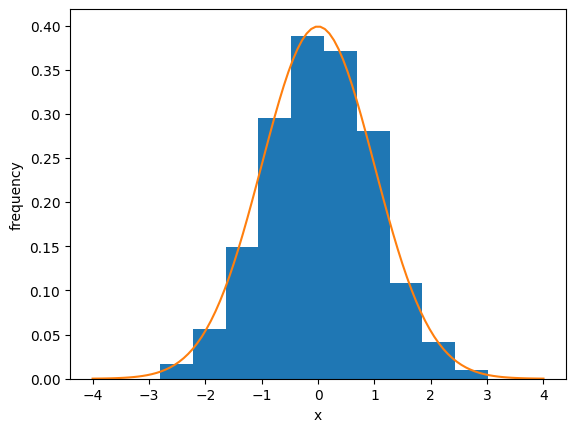

In [ ]:

T=199
def ForwardDiffusionFast(x0,at_,t):
  x0= (at_[t])**(1/2)*x0+(1-at_[t])**(1/2)*np.random.randn()
  return x0
xss=[]
for i in range(1000):
  xss.append(ForwardDiffusionFast(0,at_,199))
xs=np.linspace(-4,4,100)
ys=[]
for x in xs:
  ys.append(p1(x))
plt.hist(xss,density=True)
plt.plot(xs,ys)
plt.xlabel("x")
plt.ylabel("frequency")

In [ ]:
def GuessZ0(xt,t):
  return (xt-(at_[t])**(1/2)*x0)/(1-at_[t])**(1/2)
def SamplePInt():
  return 0.4

In [ ]:
T = 200
at = []
at_=[]
at__=1

att = 1
beta = np.linspace(0.0001, 0.02, T,dtype=np.float32)
for t in range(T):
    att=att*(1-beta[t])
for t in range(T):
  at.append(1-beta[t])
  at__=at__*(1-beta[t])
  at_.append(at__)

5 runs of undifussing from T = 199:

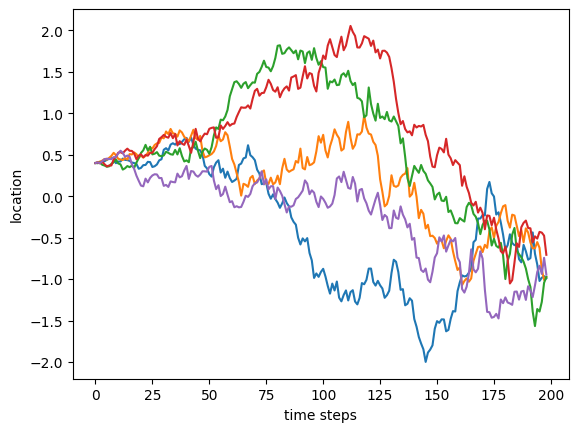

In [ ]:
T = 199
x0 = SamplePInt()
def ForwardDiffusionFast(x0,at_,t):
  x0= (at_[t])**(1/2)*x0+(1-at_[t])**(1/2)*np.random.randn()
  return x0
def undiffuse(xt,t):
    delta = 1
    st = (1-at[t])/(1-at_[t])**(1/2)
    beta_til = (1-at_[t-1])/(1-at_[t])*beta[t]
    if t == 0:
        delta = 0
    xt=1/(at[t])**(1/2)*(xt-st*GuessZ0(xt,t))+delta*(beta_til)**(1/2)*np.random.randn()
    return xt
x0 = SamplePInt()
x = ForwardDiffusionFast(x0,at_,T)
for i in range(5):
  x_=x
  ts = []
  x1 = []
  for t in reversed(range(T)):
    x_ = undiffuse(x_,t)
    x1.append(x_)
    ts.append(t)
  plt.plot(ts,x1)
plt.xlabel("time steps")
plt.ylabel("location")
plt.show()
#plt.hist(xs)
# plt.show()

undifussing delta function:

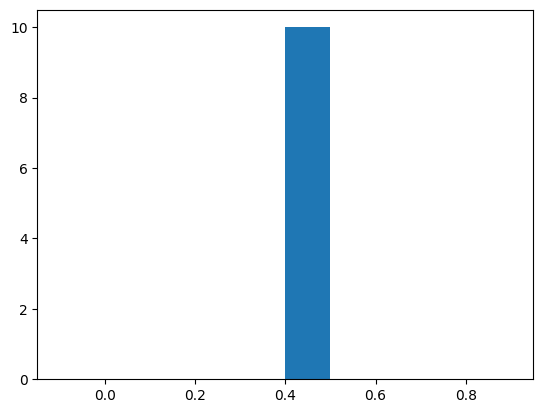

In [ ]:
T =199
xss=[]
def SamplePInt():
  return 0.4
for i in range(10000):
  x0 = SamplePInt()
  x = ForwardDiffusionFast(x0,at_,T)
  for t in reversed(range(T)):
    x = undiffuse(x,t)
  xss.append(x)
plt.hist(xss,density = True)
plt.show()

difussing from 0 to 125 graph:
undifussing from 199 to 125 graph:

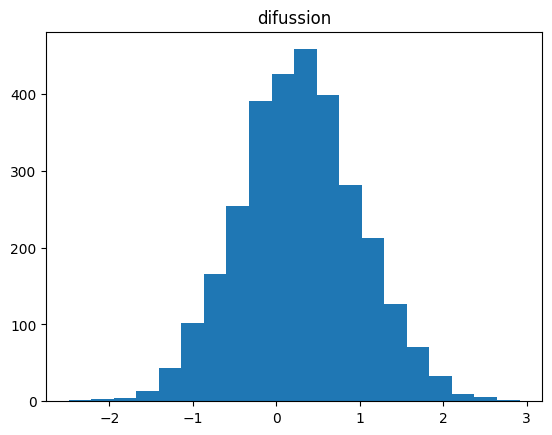

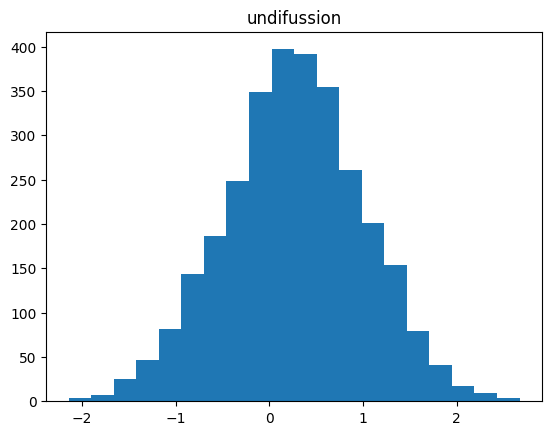

In [ ]:
xss1=[]
xss2=[]
for i in range(3000):
  x0 = SamplePInt()
  x = ForwardDiffusionFast(x0,at_,199)
  for t in reversed(range(125,199)):
    x = undiffuse(x,t)
  xss1.append(x)
  x1=ForwardDiffusionFast(x0,at_,125)
  xss2.append(x1)
plt.hist(xss1,bins = 20)
plt.title('difussion')
plt.show()
plt.title('undifussion')
plt.hist(xss2,bins = 20)
plt.show()

probability with probabilistic initial conditions:

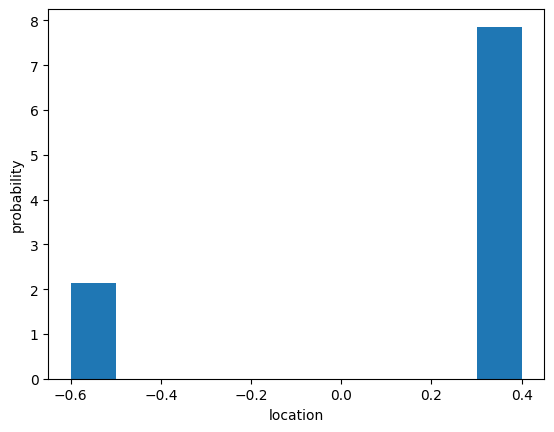

In [ ]:
def SamplePInt1():
  p = np.random.uniform()
  if p >0.2:
    return 0.4
  else:
    return -0.6
def GuessZ01(xt,t):
  z1=(xt-(at_[t])**(1/2)*0.4)/(1-at_[t])**(1/2)
  z2=(xt-(at_[t])**(1/2)*(-0.6))/(1-at_[t])**(1/2)
  return (0.8*z1*np.exp(-z1**2/2)+0.2*z2*np.exp(-z2**2/2))/(0.8*np.exp(-z1**2/2)+0.2*np.exp(-z2**2/2))

def undiffuse1(xt,t):
    delta = 1
    st = (1-at[t])/(1-at_[t])**(1/2)
    beta_til = (1-at_[t-1])/(1-at_[t])*beta[t]
    if t == 0:
        delta = 0
    xt=1/(at[t])**(1/2)*(xt-st*GuessZ01(xt,t))+delta*(beta_til)**(1/2)*np.random.randn()
    return xt
xss=[]
for i in range(1000):
  x0 = SamplePInt1()
  x = ForwardDiffusionFast(x0,at_,T)
  for t in reversed(range(T)):
    x = undiffuse1(x,t)
  xss.append(x)
plt.hist(xss,density=True)
plt.xlabel("location")
plt.ylabel("probability")
plt.show()

ten runs of guesses as a function of t:

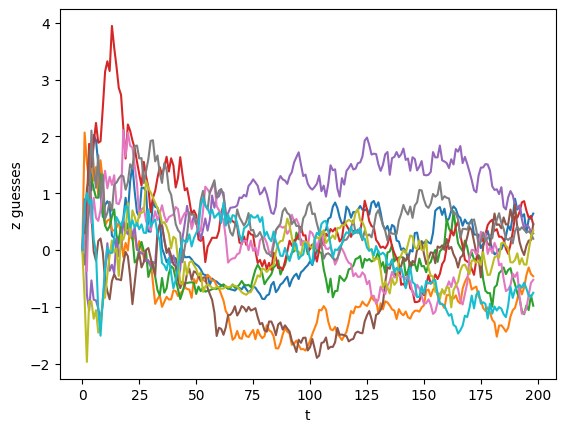

In [ ]:
x0 = SamplePInt1()
x = ForwardDiffusionFast(x0,at_,T)
for i in range(10):
  zs=[]
  ts=[]
  for t in reversed(range(199)):
    x = undiffuse1(x,t)
    z= GuessZ01(x,t)
    zs.append(z)
    ts.append(t)
  plt.plot(ts,zs)
plt.xlabel('t')
plt.ylabel('z guesses')
plt.show()



In [ ]:
def SamplePInt():
  return 0.4

In [ ]:
def ForwardDiffusionFast2(x0,at_,t):
  z = np.random.randn()
  x0= (at_[t])**(1/2)*x0+(1-at_[t])**(1/2)*z
  return x0,z

In [ ]:
import torch
import torchvision
from torch import nn

n_input, n_hidden, n_out = 2, 15, 1
net = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      )
net(torch.tensor([3.0,4]))

tensor([0.3355], grad_fn=<AddBackward0>)

In [ ]:
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-3)
losss = []
steps = []

for step in range(0,100000):
  opt.zero_grad()
  x0= SamplePInt()
  t = np.random.randint(0,199)
  x,z = ForwardDiffusionFast2(x0,at_,t)
  # call your FowardDiffusionFast (make sure you return the noisyData and the noise)
  noisyData=torch.tensor([x,t]).float() # include the time for the data
  noise=torch.tensor([z]) #make it so pytorch reads the noise
  loss=loss_fn(noise,net(noisyData))
  steps.append(step)
  loss.backward()
  opt.step()
  losss.append(loss.item())

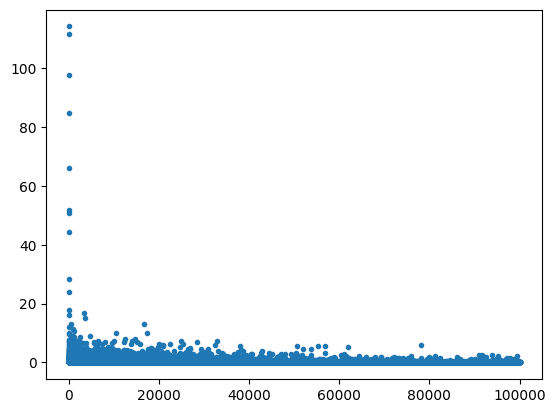

In [ ]:
plt.plot(steps,losss,'.')

In [ ]:
len(losss)

100000

The average of loss over 100 outputs:

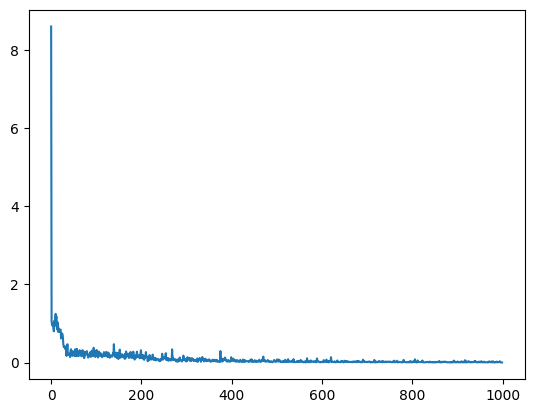

In [ ]:
ave = []
bigt=[]
for i in range(1000):
  ave.append(sum(losss[i*100:(i+1)*100])/100)
  bigt.append(i)
plt.plot(bigt,ave)

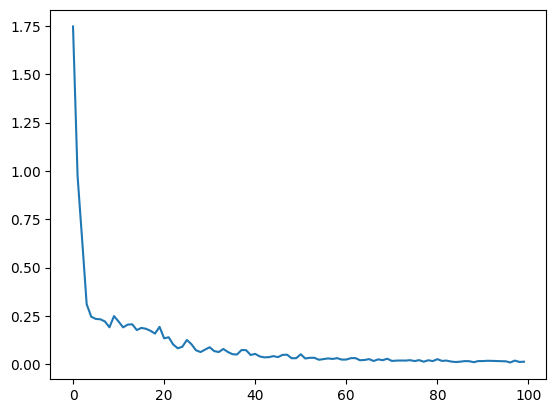

In [ ]:
ave = []
bigt=[]
for i in range(100):
  ave.append(sum(losss[i*1000:(i+1)*1000])/1000)
  bigt.append(i)
plt.plot(bigt,ave)

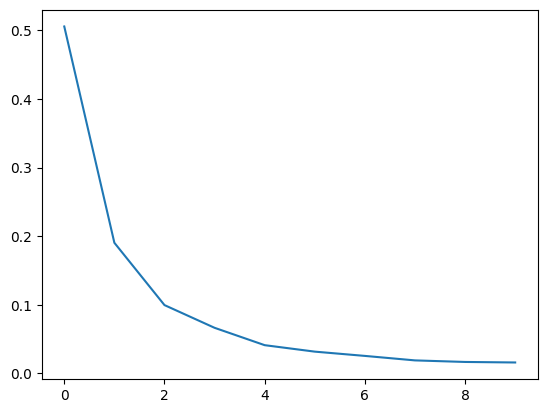

In [ ]:
ave = []
bigt=[]
for i in range(10):
  ave.append(sum(losss[i*10000:(i+1)*10000])/10000)
  bigt.append(i)
plt.plot(bigt,ave)

In [ ]:
#guess=net(torch.tensor([float(x_t),t]))
def GuessZ02(xt,t):
  guess=net(torch.tensor([float(xt),t]))
  return float(guess)

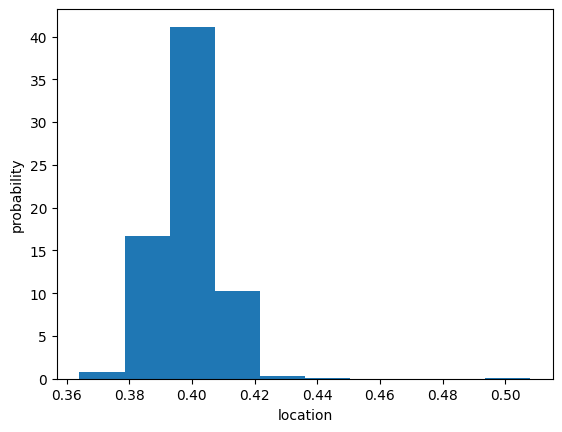

In [ ]:
def undiffuse2(xt,t):
    delta = 1
    st = (1-at[t])/(1-at_[t])**(1/2)
    beta_til = (1-at_[t-1])/(1-at_[t])*beta[t]
    if t == 0:
        delta = 0
    xt=1/(at[t])**(1/2)*(xt-st*GuessZ02(xt,t))+delta*(beta_til)**(1/2)*np.random.randn()
    return xt
xss=[]
for i in range(1000):
  x0 = SamplePInt1()
  x = ForwardDiffusionFast(x0,at_,T)
  for t in reversed(range(T)):
    x = undiffuse2(x,t)
  xss.append(x)
plt.hist(xss,density=True)
plt.xlabel("location")
plt.ylabel("probability")
plt.show()

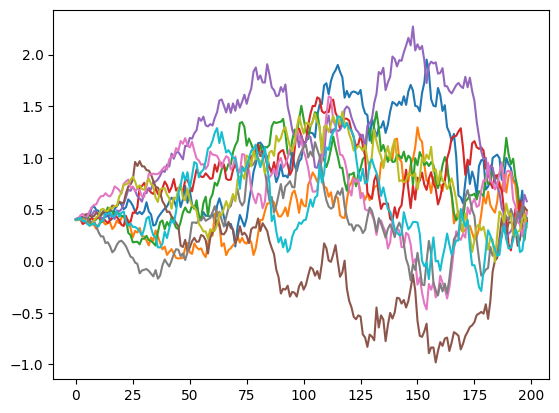

In [ ]:
for i in range(10):
  x_=x
  ts = []
  x1 = []
  for t in reversed(range(T)):
    x_ = undiffuse2(x_,t)
    x1.append(x_)
    ts.append(t)
  plt.plot(ts,x1)

In [ ]:
def SamplePInt1():
  p = np.random.uniform()
  if p >0.2:
    return 0.4
  else:
    return -0.6

def undiffuse1(xt,t):
    delta = 1
    st = (1-at[t])/(1-at_[t])**(1/2)
    beta_til = (1-at_[t-1])/(1-at_[t])*beta[t]
    if t == 0:
        delta = 0
    xt=1/(at[t])**(1/2)*(xt-st*GuessZ01(xt,t))+delta*(beta_til)**(1/2)*np.random.randn()
    return xt
import torch
import torchvision
from torch import nn

n_input, n_hidden, n_out = 2, 15, 1
net = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      )
net(torch.tensor([3.0,4]))

tensor([0.3563], grad_fn=<AddBackward0>)

In [ ]:
import numpy as np
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-3)
losss = []
steps = []

for step in range(0,100000):
  opt.zero_grad()
  x0= SamplePInt1()
  t = np.random.randint(0,199)
  x,z = ForwardDiffusionFast2(x0,at_,t)
  # call your FowardDiffusionFast (make sure you return the noisyData and the noise)
  noisyData=torch.tensor([x,t]).float() # include the time for the data
  noise=torch.tensor([z]) #make it so pytorch reads the noise
  loss=loss_fn(noise,net(noisyData))
  steps.append(step)
  loss.backward()
  opt.step()
  losss.append(loss.item())

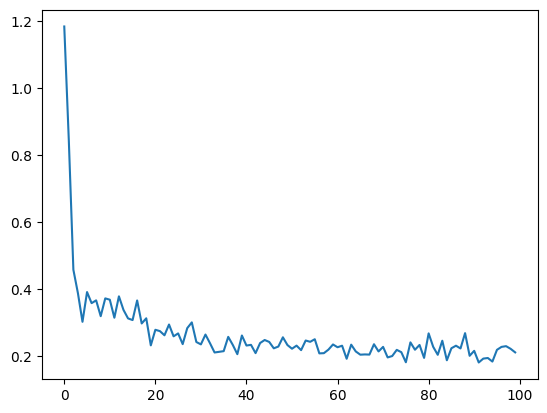

In [ ]:
import matplotlib.pyplot as plt

ave = []
bigt=[]
for i in range(100):
  ave.append(sum(losss[i*1000:(i+1)*1000])/1000)
  bigt.append(i)
plt.plot(bigt,ave)

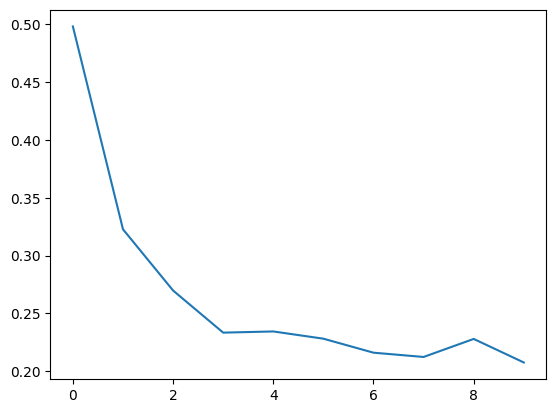

In [ ]:
ave = []
bigt=[]
for i in range(10):
  ave.append(sum(losss[i*10000:(i+1)*10000])/10000)
  bigt.append(i)
plt.plot(bigt,ave)

In [ ]:
def GuessZ02(xt,t):
  guess=net(torch.tensor([float(xt),t]))
  return float(guess)

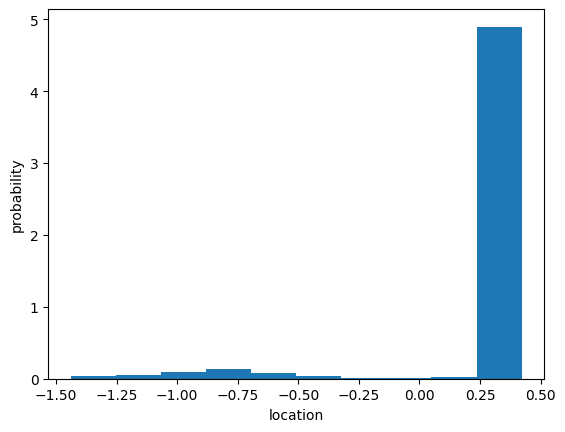

In [ ]:
def undiffuse2(xt,t):
    delta = 1
    st = (1-at[t])/(1-at_[t])**(1/2)
    beta_til = (1-at_[t-1])/(1-at_[t])*beta[t]
    if t == 0:
        delta = 0
    xt=1/(at[t])**(1/2)*(xt-st*GuessZ02(xt,t))+delta*(beta_til)**(1/2)*np.random.randn()
    return xt
xss=[]
for i in range(1000):
  x0 = SamplePInt1()
  x = ForwardDiffusionFast(x0,at_,T)
  for t in reversed(range(T)):
    x = undiffuse2(x,t)
  xss.append(x)
plt.hist(xss,density=True)
plt.xlabel("location")
plt.ylabel("probability")
plt.show()

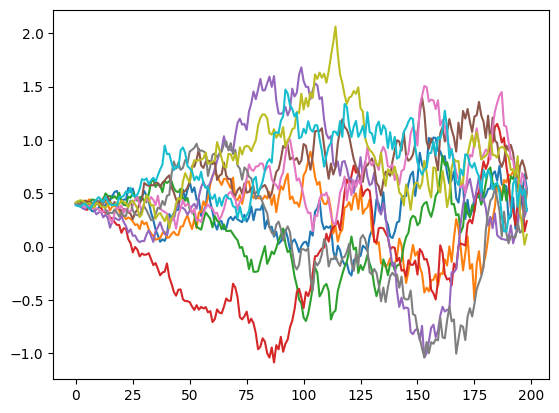

In [ ]:
for i in range(10):
  x_=x
  ts = []
  x1 = []
  for t in reversed(range(T)):
    x_ = undiffuse2(x_,t)
    x1.append(x_)
    ts.append(t)
  plt.plot(ts,x1)